In [249]:
from bs_fdbck.constants import path_measurement_data
import matplotlib.pyplot as plt

In [250]:
import pandas as pd
import numpy as np
import xarray as xr
xr.set_options(keep_attrs=True)

In [251]:
import datetime 

In [252]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [253]:
path_acsm = path_measurement_data / 'ACSM_DEFAULT.mat'

In [254]:
fn_pres = path_measurement_data / 'SMEARII'/ 'smeardata_20230307_pressure.csv'
fn_rad = path_measurement_data / 'SMEARII'/ 'smeardata_20221116_radiation.csv'
fn_temp4m = path_measurement_data / 'SMEARII'/'smeardata_20230307_temp4m.csv'

In [255]:
fl_meteo = ['smeardata_20221116_2012-2014.csv', 'smeardata_20221116_2014-2016.csv', 'smeardata_20221116_2016-2018.csv',
      'smeardata_20221116_2018-2019.csv']
fl_meteo = [path_measurement_data/'SMEARII'/f for f in fl_meteo]


### Output data

In [256]:
postproc_data = path_measurement_data /'SMR'/'processed'
postproc_data.mkdir( parents = True, exist_ok=True)

In [257]:

path_comb_data =postproc_data /'SMEARII_data_comb_daily.nc'
path_comb_data_full_time =postproc_data /'SMEAR_data_comb_hourly.csv'

### Read in acsm data

### Input data:


In [258]:
path_measurement_data

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data')

In [259]:
f = '/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/ACSM_DEFAULT.mat'

## Partilces 

In [260]:
xlist = [50, 80, 100, 150, 200, 250, 300]

DMPS data is downloaded from EBAS

In [261]:
_f = '/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'

Data is downloaded from EBAS: 

https://ebas-data.nilu.no/DataSets.aspx?stations=FI0050R&nations=FI246FIN&InstrumentTypes=dmps&components=particle_number_size_distribution&fromDate=1970-01-01&toDate=2023-12-31

In [262]:
from bs_fdbck.util.EBAS_data import get_ebas_dataset_Nx_daily_JA_median_df, get_ebas_dataset_with_Nx,get_station_ebas_data

ds_sizedist = get_station_ebas_data(station='SMR')

#ds_ebas_Nx = get_ebas_dataset_with_Nx()
ds_ebas_Nx = get_ebas_dataset_with_Nx(x_list=xlist, station = 'SMR', ds = ds_sizedist)#x_list = [90,100,110,120])
ds_ebas_Nx['time'].attrs['timezone'] = 'UTC'

Importing files: 
[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20130101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20140101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20150101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20160101000000.2022022

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:559: FutureWarning:

Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:560: FutureWarning:

Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:559: FutureWarning:

Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/core/missing.py:560: FutureWarning:

Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method

## Timezone local time eastern winter time EET UTC+2

In [263]:
import datetime

In [264]:
from bs_fdbck.util.BSOA_datamanip import standard_air_density

In [265]:
if ds_ebas_Nx['time'].attrs['timezone']=='UTC':
    
    ds_ebas_Nx['time_utc'] = ds_ebas_Nx['time'].copy()
    ds_ebas_Nx['time'] = pd.to_datetime(ds_ebas_Nx['time_utc']) + datetime.timedelta(hours=2)
    ds_ebas_Nx['time'].attrs = ds_ebas_Nx['time_utc'].attrs.copy()
    ds_ebas_Nx['time']=  ds_ebas_Nx['time'].assign_attrs(timezone='EEST')

In [266]:
ds_Nx_hourly = ds_ebas_Nx.resample(time='1h').median()[[f'N{n}' for n in xlist]]

ds_Nx_hourly_mean = ds_ebas_Nx.resample(time='1h').mean()[[f'N{n}' for n in xlist]]

df_ebas_Nx  = ds_Nx_hourly_mean.to_dataframe()
df_ebas_Nx

,N50,N80,N100,N150,N200,N250,N300
time,,,,,,,
2012-01-01 02:00:00,474.717694,306.616092,235.864279,137.173123,87.040280,52.205053,29.899803
2012-01-01 03:00:00,516.631120,341.513573,264.511665,152.428974,96.878629,59.321288,33.998613
2012-01-01 04:00:00,635.704219,431.524799,334.590614,189.614898,117.824268,70.343558,39.921649
2012-01-01 05:00:00,859.767868,603.801309,465.870302,251.464244,147.150787,86.925009,50.451064
2012-01-01 06:00:00,1249.259621,881.768743,684.944162,379.522949,221.376488,128.856136,76.218054
...,...,...,...,...,...,...,...
2018-12-31 21:00:00,242.483006,172.140209,138.361021,71.788172,35.610311,15.973082,7.646265
2018-12-31 22:00:00,226.782610,139.861512,109.549075,53.552937,24.765184,10.040581,4.770128
2018-12-31 23:00:00,178.178957,102.056089,77.719809,33.131727,13.115932,5.133396,2.542448


In [267]:
import pandas as pd

In [268]:
from bs_fdbck.constants import path_measurement_data

In [269]:
fn = path_measurement_data / 'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )



In [270]:

df_hyy_1 = df_hyy_1.set_index('date')

In [271]:
df_hyy_1.index = df_hyy_1.index.rename('time') 

In [272]:
R = 287.058
df_hyy_1['rho'] = 1e5/(R*(df_hyy_1['T (degree C)']+273.15))
df_hyy_1['N100 (cm^-3),STP'] = df_hyy_1['N100 (cm^-3)']*standard_air_density/df_hyy_1['rho']


In [273]:
import matplotlib.pyplot as plt

## Check integration against Yli-Juuti et al 

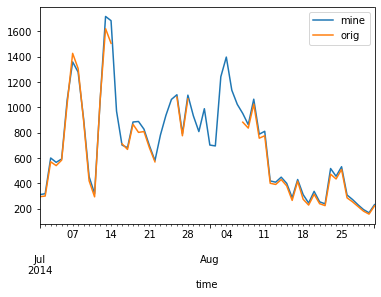

1.102144814634486


In [274]:

df_joint_hyy = pd.merge(df_ebas_Nx.resample('1D').median(), df_hyy_1, left_index=True, right_index=True)
(df_joint_hyy['N100']).loc['2014-07':'2014-09'].plot(label='mine')
(df_joint_hyy['N100 (cm^-3),STP']).loc['2014-07':'2014-09'].plot(label='orig')
plt.legend()
plt.show()



print(df_joint_hyy['N100'][df_joint_hyy['N100 (cm^-3)'].notnull()].mean()/df_joint_hyy['N100 (cm^-3)'].mean())

## Meteo data

Already in local time EET (UTC+2)

In [275]:
df_rad = pd.read_csv(fn_rad)

In [276]:
df_rad['time'] = pd.to_datetime(df_rad[['Year', 'Month', 'Day', 'Hour','Minute']].apply(lambda s : datetime.datetime(*s),axis = 1))

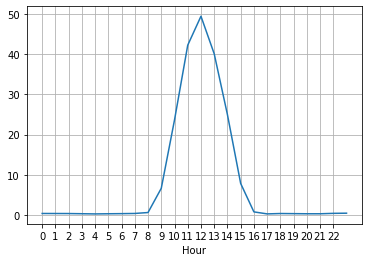

In [277]:
_df_june = df_rad[df_rad.Month==1]
_df=_df_june.groupby('Hour').mean()
_df['HYY_META.Glob'].plot()
plt.xticks(range(0,23));
plt.grid()
#plt.ylim([0,4])

In [278]:
def compute_u_v(ws, theta):
    theta_rad = theta/360*2*np.pi
    u = ws*np.cos(theta_rad)
    v = ws*np.sin(theta_rad)
    return u, v

def comp_ws_theta(u,v):
    ws = np.sqrt(u**2+v**2)
    theta =(np.arctan2(v, u))%(2*np.pi)*360/2/np.pi#*360/(2*np.pi)
    return ws, theta
    

## Average wind by hour: 

First compute U,V, then average, and then recompute direction and strength


In [279]:
def make_hourly_wind(df_met_hr, var_ws, var_theta):
    df_met_hr['U'], df_met_hr['V'] = compute_u_v(df_met_hr[var_ws],df_met_hr[var_theta]) 

    df_met_hour = fix_time_meteo(df_met_hr)
    
    df_met_hour[var_ws],df_met_hour[var_theta] = comp_ws_theta(df_met_hour['U'], df_met_hour['V'])

    return df_met_hour

def fix_time_meteo(df_met_hr):
    df_met_hr['time'] = pd.to_datetime(df_met_hr[['Year', 'Month', 'Day', 'Hour','Minute']].apply(lambda s : datetime.datetime(*s),axis = 1))

    df_met_hr = df_met_hr.set_index('time')

    df_met_hour = df_met_hr.resample('h').mean()
    return df_met_hour


In [280]:
var_ws = 'HYY_META.WSU168'
var_theta = 'HYY_META.WDU168'
var_ws2 = 'HYY_META.WSU672'
var_theta2 = 'HYY_META.WDU672'
df_ls = list()
for f in fl_meteo:
    df = pd.read_csv(f)
    df_hourly = make_hourly_wind(df, var_ws, var_theta)
    df_hourly2 = make_hourly_wind(df, var_ws2, var_theta2)
    for v in [var_ws2, var_theta2]:
        df_hourly[v] = df_hourly2[v]
    
    df_ls.append(df_hourly)

In [281]:
df_meteo= pd.concat(df_ls)

<AxesSubplot:ylabel='Frequency'>

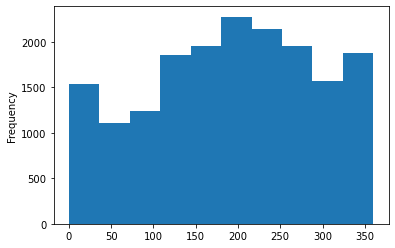

In [282]:
df_hourly['HYY_META.WDU168'].plot.hist()

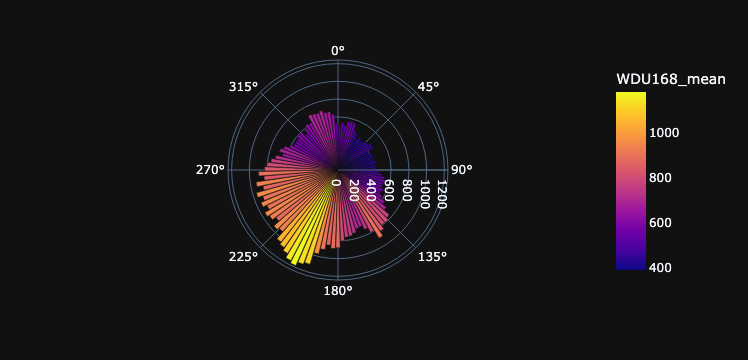

In [283]:
bins_dir = np.linspace(0,360, 100)

df_meteo['WDU168_mid']= pd.cut(df_meteo['HYY_META.WDU168'], bins_dir).apply(lambda x: x.mid)

df_freq = df_meteo.groupby('WDU168_mid').count()

df_mean = df_meteo.groupby('WDU168_mid').mean()

df_comb = pd.DataFrame(index=df_freq.index)

df_comb['WDU168_freq'] = df_freq['HYY_META.WDU168']

df_comb['WDU168_mean'] = df_freq['HYY_META.WSU168']

bins_dir = np.linspace(0,360)

df_meteo['WSU168_mid']= pd.cut(df_meteo['HYY_META.WSU168'], bins_dir).apply(lambda x: x.mid)

import plotly.express as px

df = df_meteo
fig = px.bar_polar(df_comb.reset_index(), r='WDU168_freq', theta='WDU168_mid',
                   color="WDU168_mean", 
                   template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

### Read in pressure:

In [284]:
df_meteo_pres = pd.read_csv(fn_pres)
df_meteo_temp4m = pd.read_csv(fn_temp4m)

df_meteo_pres = fix_time_meteo(df_meteo_pres)
df_meteo_temp4m = fix_time_meteo(df_meteo_temp4m)

In [285]:
df_meteo_pres

,Year,Month,Day,Hour,Minute,Second,HYY_META.Pamb0
time,,,,,,,
2012-01-01 00:00:00,2012.0,1.0,1.0,0.0,0.0,0.0,985.18983
2012-01-01 01:00:00,2012.0,1.0,1.0,1.0,0.0,0.0,985.61817
2012-01-01 02:00:00,2012.0,1.0,1.0,2.0,0.0,0.0,986.22833
2012-01-01 03:00:00,2012.0,1.0,1.0,3.0,0.0,0.0,986.68267
2012-01-01 04:00:00,2012.0,1.0,1.0,4.0,0.0,0.0,987.08667
...,...,...,...,...,...,...,...
2018-01-01 19:00:00,2018.0,1.0,1.0,19.0,0.0,0.0,971.00317
2018-01-01 20:00:00,2018.0,1.0,1.0,20.0,0.0,0.0,970.32450
2018-01-01 21:00:00,2018.0,1.0,1.0,21.0,0.0,0.0,969.87250


In [286]:
df_meteo_others = pd.merge(df_meteo_pres['HYY_META.Pamb0'],df_meteo_temp4m,right_index=True,left_index=True, how = 'outer')

In [287]:
df_meteo_others

,HYY_META.Pamb0,Year,Month,Day,Hour,Minute,Second,HYY_META.T42
time,,,,,,,,
2012-01-01 00:00:00,985.18983,2012.0,1.0,1.0,0.0,0.0,0.0,NaN
2012-01-01 01:00:00,985.61817,2012.0,1.0,1.0,1.0,0.0,0.0,NaN
2012-01-01 02:00:00,986.22833,2012.0,1.0,1.0,2.0,0.0,0.0,NaN
2012-01-01 03:00:00,986.68267,2012.0,1.0,1.0,3.0,0.0,0.0,NaN
2012-01-01 04:00:00,987.08667,2012.0,1.0,1.0,4.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
2018-01-01 19:00:00,971.00317,2018.0,1.0,1.0,19.0,0.0,0.0,-0.14617
2018-01-01 20:00:00,970.32450,2018.0,1.0,1.0,20.0,0.0,0.0,-0.10833
2018-01-01 21:00:00,969.87250,2018.0,1.0,1.0,21.0,0.0,0.0,0.07067


In [288]:

df_meteo = pd.merge(df_meteo, df_meteo_others[['HYY_META.Pamb0','HYY_META.T42']], right_index=True, left_index=True)

In [289]:
df_meteo = df_meteo.rename({'HYY_META.Pamb0_y':'HYY_META.Pamb0'}, axis=1)

<AxesSubplot:xlabel='time'>

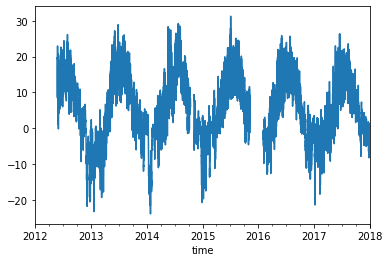

In [290]:

df_meteo['HYY_META.T42'].plot()

<AxesSubplot:xlabel='time'>

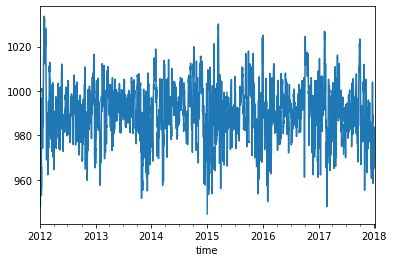

In [291]:

df_meteo['HYY_META.Pamb0'].plot()

In [292]:
from bs_fdbck.constants import path_measurement_data
import pandas as pd

In [293]:
    
def timeround10(dt):
    a, b = divmod(round(dt.minute, -1), 60)
    tdelta = datetime.timedelta(hours = (dt.hour+a), minutes=b)
    nh = (dt.hour+a)%24
    ndt = datetime.datetime(dt.year,dt.month, dt.day,) + tdelta
    #dt_o = datetime.datetime(dt.year,dt.month, dt.day, (dt.hour + a) % 24,b)
    return ndt



def fix_matlabtime(t):
    ind = pd.to_datetime(t-719529, unit='D')
    ind_s = pd.Series(ind)
    return ind_s.apply(timeround10)
    
    


In [294]:
fn_liine = path_measurement_data / 'ACSM_DEFAULT.mat'

In [295]:
varlist_acsm = ['time', 'Org','SO4','NO3','NH4','Chl']

<AxesSubplot:xlabel='time'>

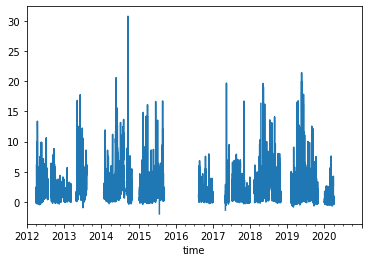

In [296]:
import scipy.io as sio
test = sio.loadmat(fn_liine)

df_lii = pd.DataFrame(test['ACSM_DEFAULT'], columns=varlist_acsm)#.set_index('time')

df_lii['time'] = fix_matlabtime(df_lii['time'])# + datetime.timedelta(hours=1)

df_lii = df_lii.set_index('time')

df_lii['Org'].plot()

## Combine datasets

In [297]:
df_lii

,Org,SO4,NO3,NH4,Chl
time,,,,,
2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2012-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN
2012-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN
2012-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN
2012-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN
2020-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN
2020-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN


In [298]:
df_ebas_Nx

,N50,N80,N100,N150,N200,N250,N300
time,,,,,,,
2012-01-01 02:00:00,474.717694,306.616092,235.864279,137.173123,87.040280,52.205053,29.899803
2012-01-01 03:00:00,516.631120,341.513573,264.511665,152.428974,96.878629,59.321288,33.998613
2012-01-01 04:00:00,635.704219,431.524799,334.590614,189.614898,117.824268,70.343558,39.921649
2012-01-01 05:00:00,859.767868,603.801309,465.870302,251.464244,147.150787,86.925009,50.451064
2012-01-01 06:00:00,1249.259621,881.768743,684.944162,379.522949,221.376488,128.856136,76.218054
...,...,...,...,...,...,...,...
2018-12-31 21:00:00,242.483006,172.140209,138.361021,71.788172,35.610311,15.973082,7.646265
2018-12-31 22:00:00,226.782610,139.861512,109.549075,53.552937,24.765184,10.040581,4.770128
2018-12-31 23:00:00,178.178957,102.056089,77.719809,33.131727,13.115932,5.133396,2.542448


In [299]:
df_meteo

,Year,Month,Day,Hour,Minute,Second,HYY_META.WDU672,HYY_META.WSU168,HYY_META.WSU672,HYY_META.T672,HYY_META.WDU168,HYY_META.RH168,HYY_META.T168,HYY_META.RH672,U,V,WDU168_mid,WSU168_mid,HYY_META.Pamb0,HYY_META.T42
time,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,2012.0,1.0,1.0,0.0,29.5,0.0,NaN,0.768877,NaN,-6.228155,185.678525,NaN,-6.453500,NaN,-0.765104,-0.076078,187.2730,3.6735,985.18983,NaN
2012-01-01 01:00:00,2012.0,1.0,1.0,1.0,29.5,0.0,NaN,0.487818,NaN,-5.951797,167.190631,NaN,-6.553825,NaN,-0.475677,0.108153,165.4545,3.6735,985.61817,NaN
2012-01-01 02:00:00,2012.0,1.0,1.0,2.0,29.5,0.0,NaN,0.553307,NaN,-5.993273,163.229489,NaN,-6.176323,NaN,-0.529774,0.159651,161.8180,3.6735,986.22833,NaN
2012-01-01 03:00:00,2012.0,1.0,1.0,3.0,29.5,0.0,NaN,0.523611,NaN,-5.995248,167.980277,NaN,-5.923486,NaN,-0.512131,0.109041,169.0910,3.6735,986.68267,NaN
2012-01-01 04:00:00,2012.0,1.0,1.0,4.0,29.5,0.0,NaN,0.540031,NaN,-5.883390,165.419219,NaN,-5.757813,NaN,-0.522639,0.135950,165.4545,3.6735,987.08667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 19:00:00,2018.0,1.0,1.0,19.0,29.5,0.0,117.651046,1.551506,4.988799,-1.208333,114.739066,NaN,-0.964833,NaN,-0.649284,1.409114,114.5455,3.6735,971.00317,-0.14617
2018-01-01 20:00:00,2018.0,1.0,1.0,20.0,29.5,0.0,110.454686,1.440794,4.754064,-1.140500,108.257224,NaN,-0.925000,NaN,-0.451377,1.368264,107.2730,3.6735,970.32450,-0.10833
2018-01-01 21:00:00,2018.0,1.0,1.0,21.0,29.5,0.0,101.815297,1.202456,4.476926,-1.057500,100.368749,NaN,-0.830500,NaN,-0.216421,1.182820,100.0000,3.6735,969.87250,0.07067


<AxesSubplot:xlabel='time'>

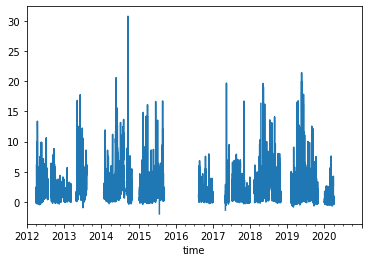

In [300]:
df_lii['Org'].plot()

In [301]:
df_all = pd.concat([df_meteo, df_lii,df_ebas_Nx], axis=1)

<AxesSubplot:xlabel='time'>

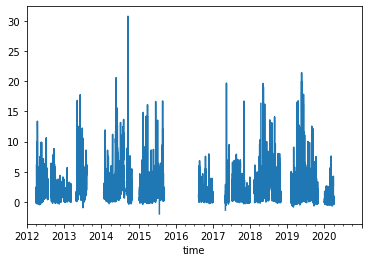

In [302]:
df_all['Org'].plot()

## Correct ACSM data to be standard temperature and pressure:

Converting by: 

\begin{align}
conc. OA_{amb}=\frac{m_{OA}}{V_{amb}} = & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{amb}} = w_{OA} \cdot \rho_{amb} 
\end{align}
and in the same way
\begin{align}
conc. OA_{STP}= & \frac{m_{OA}}{m_{air}} \cdot \frac{m_{air}}{V_{STP}} = w_{OA} \cdot \rho_{STP}
\end{align}

So finally
\begin{align}
conc. OA_{STP}= & conc. OA_{amb} \cdot \frac{\rho_{STP}}{\rho_{amb}}
\end{align}

In [303]:
pressure = df_all['HYY_META.Pamb0']
temperature = df_all['HYY_META.T42']+273.15 # In Kelvin

In [304]:
R

287.058

In [305]:
df_all['density'] = (
    pressure*100   # hPa --> Pa
    /(temperature*R)
)

<AxesSubplot:xlabel='time'>

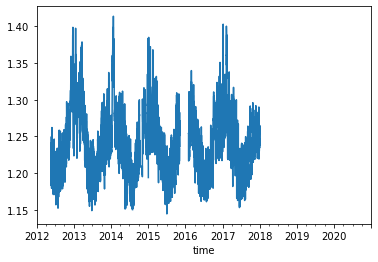

In [306]:
df_all['density'].plot()

<AxesSubplot:xlabel='time'>

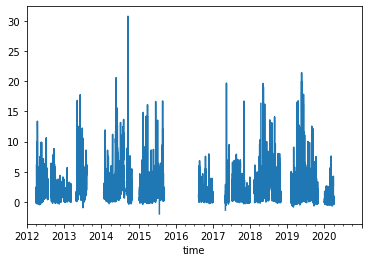

In [307]:
df_all['Org'].plot()

In [308]:
standard_air_density

1.2753492774515685

In [309]:
varlist_acsm

['time', 'Org', 'SO4', 'NO3', 'NH4', 'Chl']

In [310]:

for v in varlist_acsm:
    if v not in df_all.columns: 
        continue
    # if already processes: 
    if f'{v}_amb' in df_all: 
        continue
    df_all = df_all.rename({v:f'{v}_amb'}, axis=1)
    df_all[f'{v}_STP'] = (df_all[f'{v}_amb']/df_all['density'])*standard_air_density


<AxesSubplot:xlabel='time'>

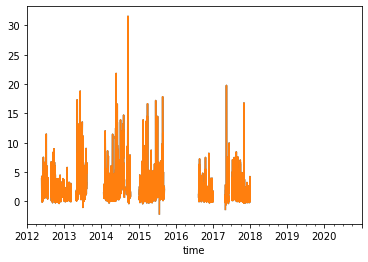

In [311]:
df_all['Org_STP'].plot()

df_all['Org_STP'].plot()

#### Check that we are not loosing values because of surface p and T

In [312]:
is_summer = df_all.index.month.isin([7,8])

In [313]:
df_all_summer = df_all[is_summer]

In [314]:
df_all_summer[['HYY_META.T42','HYY_META.Pamb0','Org_amb','HYY_META.T168']].dropna().count()

HYY_META.T42      5615
HYY_META.Pamb0    5615
Org_amb           5615
HYY_META.T168     5615
dtype: int64

In [315]:
df_all_summer[['HYY_META.Pamb0','Org_amb','HYY_META.T168']].dropna().count()

HYY_META.Pamb0    5615
Org_amb           5615
HYY_META.T168     5615
dtype: int64

In [316]:
df_all_summer[['Org_amb','HYY_META.T168']].dropna().count()

Org_amb          5615
HYY_META.T168    5615
dtype: int64

In [317]:
df_all_summer[['Org_amb']].dropna().count()

Org_amb    8779
dtype: int64

<AxesSubplot:ylabel='Frequency'>

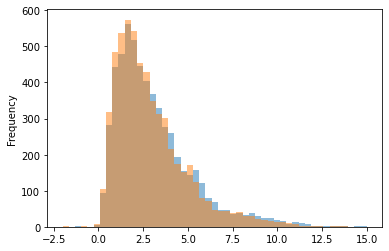

In [318]:
df_all[is_summer]['Org_STP'].plot.hist(bins=np.linspace(-2,15),alpha= .5)

df_all[is_summer&(df_all['Org_STP'].notnull())]['Org_amb'].plot.hist(bins=np.linspace(-2,15), alpha= .5)

## Filter based on wind direction 

<AxesSubplot:ylabel='Frequency'>

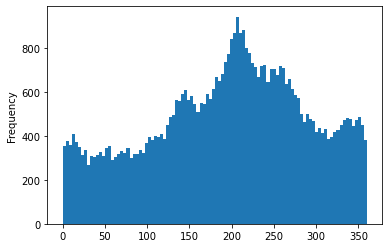

In [319]:
df_all['HYY_META.WDU168'].plot.hist(bins=100)


In [320]:
discard_wind = (df_all['HYY_META.WDU168']>=120) & (df_all['HYY_META.WDU168']<=140)

In [321]:
df_all = df_all[~discard_wind]

<AxesSubplot:ylabel='Frequency'>

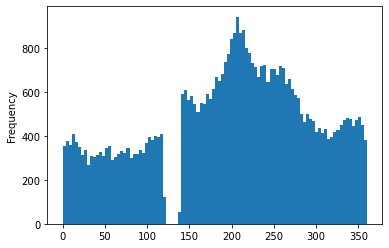

In [322]:
df_all['HYY_META.WDU168'].plot.hist(bins=100)


<AxesSubplot:ylabel='Frequency'>

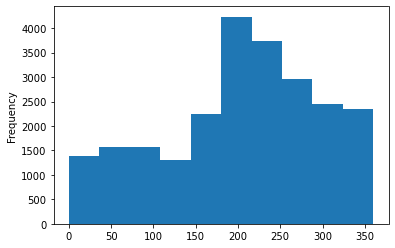

In [323]:
df_all['HYY_META.WDU672'].plot.hist()


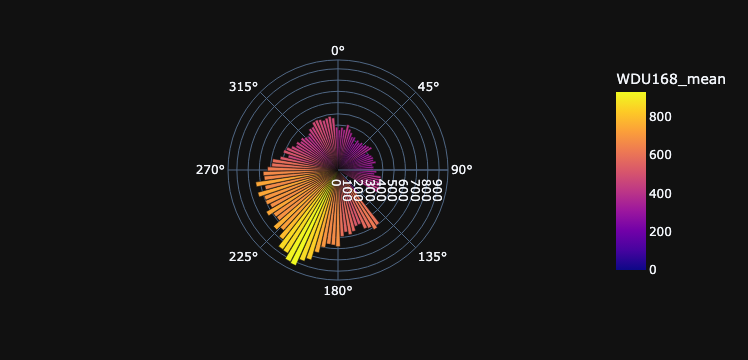

In [324]:
bins_dir = np.linspace(0,360, 100)
_df_meteo = df_all.copy()
_df_meteo['WDU168_mid']= pd.cut(_df_meteo['HYY_META.WDU168'], bins_dir).apply(lambda x: x.mid)

df_freq = _df_meteo.groupby('WDU168_mid').count()

df_mean = _df_meteo.groupby('WDU168_mid').mean()

df_comb = pd.DataFrame(index=df_freq.index)

df_comb['WDU168_freq'] = df_freq['HYY_META.WDU168']

df_comb['WDU168_mean'] = df_freq['HYY_META.WSU168']

bins_dir = np.linspace(0,360)

_df_meteo['WSU168_mid']= pd.cut(_df_meteo['HYY_META.WSU168'], bins_dir).apply(lambda x: x.mid)

import plotly.express as px

df = _df_meteo
fig = px.bar_polar(df_comb.reset_index(), r='WDU168_freq', theta='WDU168_mid',
                   color="WDU168_mean", 
                   template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

## Write to file

In [325]:
df_all.to_csv(path_comb_data_full_time)

In [326]:
path_comb_data_full_time

PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/SMR/processed/SMEAR_data_comb_hourly.csv')